# **SISTEM REKOMENDASI PRODUK - BIG BASKET PRODUCT**

oleh : Stevi Aprilianti Cahyani

BigBasket adalah platform pengiriman bahan makanan daring terbesar di India yang berbasis teknologi dan memungkinkan pengguna untuk membeli berbagai kebutuhan rumah tangga, mulai dari sayuran segar, buah-buahan, daging, makanan siap saji, hingga produk kebersihan rumah, secara online. Platform ini pertama kali diluncurkan pada tahun 2011 oleh perusahaan Innovative Retail Concepts Private Limited, dan kini menjadi bagian dari grup Tata Digital, salah satu konglomerat terbesar di India.

BigBasket melayani jutaan pelanggan di lebih dari 25 kota besar di India, dan telah mengembangkan jaringan yang menghubungkan pelanggan langsung dengan penjual lokal maupun gudang pusat. Melalui pendekatan ini, BigBasket menghadirkan pengalaman belanja bahan makanan yang cepat, efisien, dan dapat diandalkan, terutama bagi masyarakat urban dengan mobilitas tinggi.

## **1. Data Understanding**

### **Import Library**

In [ ]:
!pip install tensorflow

In [ ]:
# Library standar
import os
import re
import zipfile

# Untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Untuk preprocessing dan ekstraksi fitur
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Untuk pembagian data dan pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline

# Untuk evaluasi dan kemiripan
from sklearn.metrics import mean_squared_error, precision_score
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

# Untuk sistem rekomendasi atau pencarian tetangga terdekat
from sklearn.neighbors import NearestNeighbors

# Untuk upload file di Google Colab
from google.colab import files

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### **Data Loading**

In [ ]:
# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"steviapriliaa","key":"dc107a3bf1955c43ea12549dc681b0eb"}'}

In [ ]:
# Membuat direktori
!mkdir -p ~/.kaggle
# Menyalin file API `kaggle.json`
!cp kaggle.json ~/.kaggle/
# Mengatur permission file `kaggle.json`
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Mengunduh dataset "Big Basket Product" dari Kaggle menggunakan Kaggle API
!kaggle datasets download -d amrit0611/big-basket-product-analysis

Dataset URL: https://www.kaggle.com/datasets/amrit0611/big-basket-product-analysis
License(s): unknown
  0% 0.00/6.04M [00:00<?, ?B/s]
100% 6.04M/6.04M [00:00<00:00, 755MB/s]


In [ ]:
# Membuka file ZIP dari dataset yang telah diunduh
zip_ref = zipfile.ZipFile('/content/big-basket-product-analysis.zip', 'r')
# Mengekstrak seluruh isi file ZIP ke direktori /content/
zip_ref.extractall('/content/')
# Menutup file ZIP setelah proses ekstraksi selesai
zip_ref.close()

In [ ]:
# Membaca file CSV
df_products = pd.read_csv('/content/BigBasket Products.csv')
# Menampilkan isi DataFrame df_FordCar
df_products

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


### **Exploratory Data Analysis**

**1. Melihat ringkasan struktur data frame**

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


Dataset ini memiliki 10 kolom dengan total 27.555 baris data. Sebagian besar kolom berisi data bertipe *object* (kategori atau teks), beberapa berupa *float64* (angka desimal), dan hanya kolom *index* yang menggunakan tipe *int64* (angka bulat). Berikut adalah penjelasan singkat untuk masing-masing kolom:

* *index*: Nomor urut atau ID unik untuk setiap baris data.
* *product*: Nama produk yang tersedia di platform.
* *category*: Kategori utama produk, seperti bahan makanan, minuman, dan lain-lain.
* *sub\_category*: Klasifikasi yang lebih spesifik dari kategori produk.
* *brand*: Merek produk yang ditawarkan.
* *sale\_price*: Harga jual produk di platform BigBasket.
* *market\_price*: Harga pasar produk di pasaran umum.
* *type*: Jenis produk yang memberikan informasi lebih detail dibandingkan kategori atau sub-kategori.
* *rating*: Penilaian atau rating dari pengguna terhadap produk.
* *description*: Deskripsi singkat atau uraian mengenai produk tersebut.


**2. Memeriksa Statistik Deskriptif**

In [ ]:
df_products.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


Berikut penjelasan singkat dari tabel statistik deskriptif tersebut:

Tabel ini menyajikan ringkasan statistik untuk kolom numerik utama dalam dataset, yaitu `index`, `sale_price`, `market_price`, dan `rating`.

* **index**: Nomor urut data, mulai dari 1 hingga 27.555.
* **sale\_price** (harga jual): Harga jual produk rata-rata sekitar 322,5 Rupee, dengan nilai terendah 2,45 Rupee dan tertinggi 12.500 Rupee. Median harga jual (50%) adalah 190 Rupee, menunjukkan sebagian besar produk dijual di bawah harga tersebut.
* **market\_price** (harga pasar): Harga pasar rata-rata sekitar 382 Rupee, sedikit lebih tinggi dari harga jual. Harga maksimum sama-sama 12.500 Rupee, menunjukkan ada produk dengan harga sangat tinggi.
* **rating**: Rata-rata rating pengguna adalah 3,94 dari maksimal 5. Namun, rating hanya tersedia untuk 18.929 produk dari total 27.555, sehingga tidak semua produk memiliki penilaian.

Variasi harga jual dan harga pasar cukup besar, terlihat dari nilai standar deviasi yang tinggi, menandakan perbedaan harga yang signifikan antar produk. Sedangkan rating cenderung berada di kisaran menengah ke atas dengan variasi yang lebih kecil.

**3. Memeriksa Missing Value**

In [ ]:
missing_values = df_products.isnull().sum()
print(f"Terdapat {missing_values.sum()} nilai kosong di beberapa kolom berikut:")
print(missing_values[missing_values > 0])

Terdapat 8743 nilai kosong di beberapa kolom berikut:
product           1
brand             1
rating         8626
description     115
dtype: int64


**4. Memeriksa unique column**

In [ ]:
for column in df_products.columns:
    print(f'terdapat {df_products[column].nunique()}nilai unik di kolom{column}')

terdapat 27555nilai unik di kolomindex
terdapat 23540nilai unik di kolomproduct
terdapat 11nilai unik di kolomcategory
terdapat 90nilai unik di kolomsub_category
terdapat 2313nilai unik di kolombrand
terdapat 3256nilai unik di kolomsale_price
terdapat 1348nilai unik di kolommarket_price
terdapat 426nilai unik di kolomtype
terdapat 40nilai unik di kolomrating
terdapat 21944nilai unik di kolomdescription


**5. Visualisasi**

* Distribusi Jumlah Data per Kategori Produk

             Kategori Produk  Jumlah
0           Beauty & Hygiene    7867
1       Gourmet & World Food    4690
2     Kitchen, Garden & Pets    3580
3     Snacks & Branded Foods    2814
4   Foodgrains, Oil & Masala    2676
5       Cleaning & Household    2675
6                  Beverages     885
7      Bakery, Cakes & Dairy     851
8                  Baby Care     610
9        Fruits & Vegetables     557
10         Eggs, Meat & Fish     350


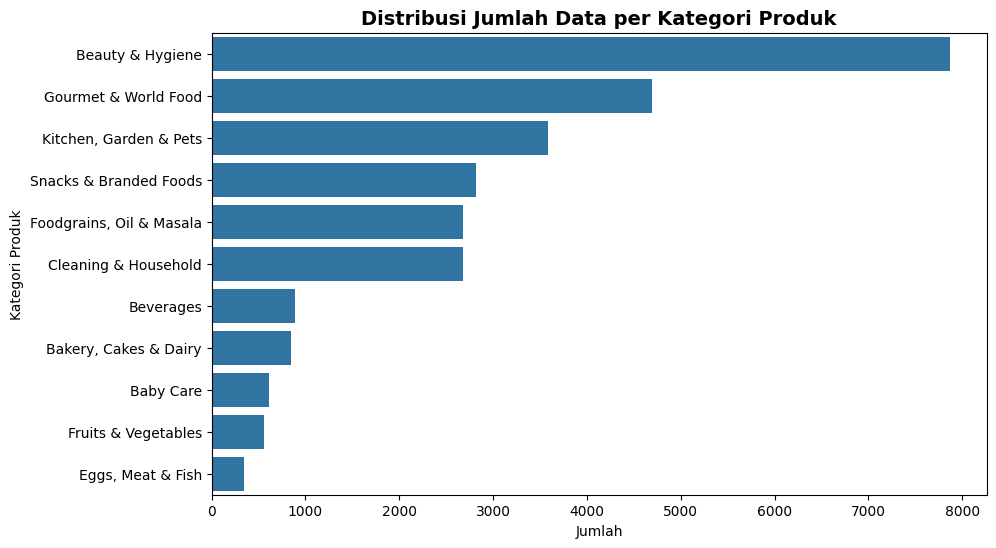

In [ ]:
# Tabel
count_per_category = df_products['category'].value_counts().reset_index()
count_per_category.columns = ['Kategori Produk', 'Jumlah']
print(count_per_category)

# Visualisasi horizontal
plt.figure(figsize=(10,6))
sns.barplot(x='Jumlah', y='Kategori Produk', data=count_per_category)
plt.title('Distribusi Jumlah Data per Kategori Produk', fontweight='bold', fontsize=14)
plt.xlabel('Jumlah')
plt.ylabel('Kategori Produk')
plt.show()

Visualisasi ini menunjukkan distribusi jumlah produk berdasarkan kategori dalam dataset. Total terdapat 11 kategori produk dengan variasi jumlah data yang cukup signifikan.

   Kategori **Beauty & Hygiene** mendominasi dengan jumlah produk terbanyak, yakni sebanyak 7.867 item, menunjukkan fokus pasar yang cukup besar pada produk perawatan dan kebersihan. Diikuti oleh kategori **Gourmet & World Food** yang memiliki 4.690 produk, dan **Kitchen, Garden & Pets** dengan 3.580 produk.
        
  Kategori lain seperti **Snacks & Branded Foods** (2.814), **Foodgrains, Oil & Masala** (2.676), dan **Cleaning & Household** (2.675) juga memiliki jumlah produk yang cukup besar, menandakan keberagaman jenis produk yang tersedia.
        
   Sementara itu, kategori dengan jumlah produk paling sedikit adalah **Eggs, Meat & Fish** dengan 350 produk, **Fruits & Vegetables** 557 dan **Baby Care** 610 produk.

* Top 10 Produk Best Seller

                               produk                  kategori  jumlah
0        Turmeric Powder/Arisina Pudi  Foodgrains, Oil & Masala      26
1                      Cow Ghee/Tuppa  Foodgrains, Oil & Masala      14
2              Extra Virgin Olive Oil      Gourmet & World Food      14
3  Colorsilk Hair Colour With Keratin          Beauty & Hygiene      12
4                          Soft Drink                 Beverages      12
5                    Coriander Powder  Foodgrains, Oil & Masala      11
6                          Ghee/Tuppa  Foodgrains, Oil & Masala      11
7                  Powder - Coriander  Foodgrains, Oil & Masala      11
8            Olive Oil - Extra Virgin      Gourmet & World Food      11
9      Casting Creme Gloss Hair Color          Beauty & Hygiene      10


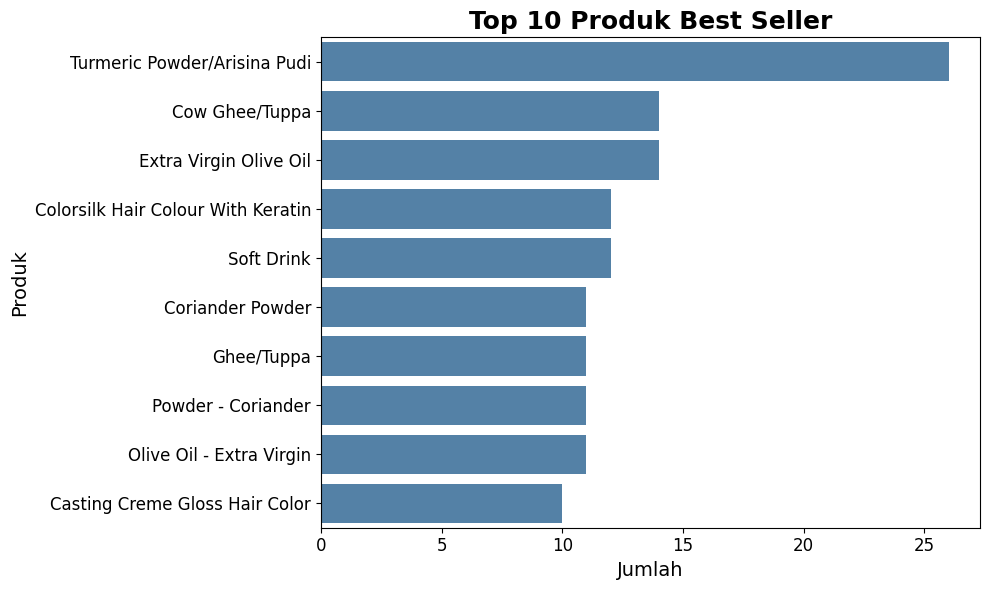

In [ ]:
# Tabel top 10 produk
top_10_products = (
    df_products[['product', 'category']]
    .value_counts()
    .reset_index(name='jumlah')
    .head(10)
)
top_10_products.columns = ['produk', 'kategori', 'jumlah']
print(top_10_products)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah', y='produk', data=top_10_products, color='steelblue')
plt.xlabel('Jumlah', fontsize=14)
plt.ylabel('Produk', fontsize=14)
plt.title('Top 10 Produk Best Seller', fontweight='bold', fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi data di atas, produk yang paling sering muncul dalam dataset didominasi oleh bahan-bahan yang
     berkaitan dengan kebutuhan memasak, seperti bumbu dapur Turmeric Powder/Arisina Pudi. Selain itu, produk lemak dan
     minyak seperti Extra Virgin Olive Oil dan Cow Ghee/Tuppa juga termasuk yang paling banyak dicatat, mengindikasikan
     popularitas tinggi dalam konsumsi rumah tangga.

* **10 Produk Paling Sedikit Terjual**

In [ ]:
from IPython.display import display
# tabel
tidak_laku = pd.DataFrame(df_products[['product', 'category']].value_counts().tail(10)).reset_index()
tidak_laku.columns = ['produk', 'kategori', 'jumlah']
print("Tabel: 10 Produk Paling Sedikit Terjual")
display(tidak_laku)


Tabel: 10 Produk Paling Sedikit Terjual


,produk,kategori,jumlah
0,"Geometry Box - Disney, Invento",Cleaning & Household,1
1,Geometry Box - Asteroid,Cleaning & Household,1
2,Geometry Box - Archimedes,Cleaning & Household,1
3,Genuine Wood Shaving Brush,Beauty & Hygiene,1
4,Gentleman Urbane Deodorant,Beauty & Hygiene,1
5,Gentleman Urbane - Eau De Parfum For Men,Beauty & Hygiene,1
6,Gentleman Classic Deodorant - For Men 150 ml +...,Beauty & Hygiene,1
7,Gentleman Classic Daily Wear Perfume EDC For Men,Beauty & Hygiene,1
8,Gentleman - Urbane Compact Perfume,Beauty & Hygiene,1
9,Geometry Box - Invento,Cleaning & Household,1


 Berdasarkan tabel di atas, terlihat bahwa produk yang  tingkat penjualan terendah didominasi oleh dua kategori utama, yaitu Cleaning & Household dan Beauty & Hygiene. Produk-produk seperti Geometry Box dari berbagai seri dan parfum pria dari seri Gentleman masing-masing hanya tercatat satu kali, mengindikasikan bahwa produk ini memiliki minat yang rendah. Hal ini dapat menjadi bahan evaluasi bagi pengelola produk untuk mengevaluasi efektivitas promosi atau kebutuhan pasar terhadap produk-produk tersebut.

* Daftar Jumlah Top Kategori dengan Rating Tertinggi (5.0)

In [ ]:
top_rating = df_products['rating'].max()
best_items = df_products.loc[df_products['rating'] == top_rating]
best_items

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
12,13,"Face Wash - Oil Control, Active",Beauty & Hygiene,Skin Care,Oxy,110.00,110.0,Face Care,5.0,This face wash deeply cleanses dirt and impuri...
16,17,Smooth Skin Oil - For Dry Skin,Beauty & Hygiene,Skin Care,Aroma Treasures,324.00,360.0,Aromatherapy,5.0,"Specially crafted for dry skin, this richly fo..."
24,25,Veggie Cutter,"Kitchen, Garden & Pets",Kitchen Accessories,IRICH,195.00,195.0,Choppers & Graters,5.0,"Food Grade High Quality Plastic, Keep and stor..."
44,45,Plain Green Olives,Gourmet & World Food,Tinned & Processed Food,Figaro,179.00,179.0,"Olive, Jalapeno, Gherkin",5.0,Olives are small fruits that grow on olive tre...
92,93,Topp Up Milk - Elaichi,"Bakery, Cakes & Dairy",Dairy,Gowardhan,80.01,90.0,"Flavoured, Soya Milk",5.0,Gowardhan Topp-Up Milk is made by 100 % of cow...
...,...,...,...,...,...,...,...,...,...,...
27507,27508,Extra Crisp Sweet Corn,Gourmet & World Food,Tinned & Processed Food,Daucy,202.50,225.0,Beans & Pulses,5.0,We bring for you Europe’s leading brand of can...
27508,27509,Palm Jaggery/Bella Crystals,"Foodgrains, Oil & Masala","Salt, Sugar & Jaggery",Draft,199.00,199.0,Sugar & Jaggery,5.0,It is a healthy alternative to white sugar and...
27512,27513,"Water Bottle - Fridge, Tulip, Dark Blue","Kitchen, Garden & Pets",Storage & Accessories,Cello,109.00,137.0,Water & Fridge Bottles,5.0,Cello Tulip fridge bottle is manufactured by J...
27515,27516,EDT Spray - Musk For Men,Beauty & Hygiene,Fragrances & Deos,Brut,595.00,595.0,Men's Deodorants,5.0,Brut Musk was launched in 1986 as an elegant m...


            Kategori Produk  Jumlah Produk
0          Beauty & Hygiene            562
1      Gourmet & World Food            273
2    Kitchen, Garden & Pets            211
3      Cleaning & Household            135
4    Snacks & Branded Foods             65
5  Foodgrains, Oil & Masala             60
6                 Baby Care             47
7                 Beverages             37
8     Bakery, Cakes & Dairy             17


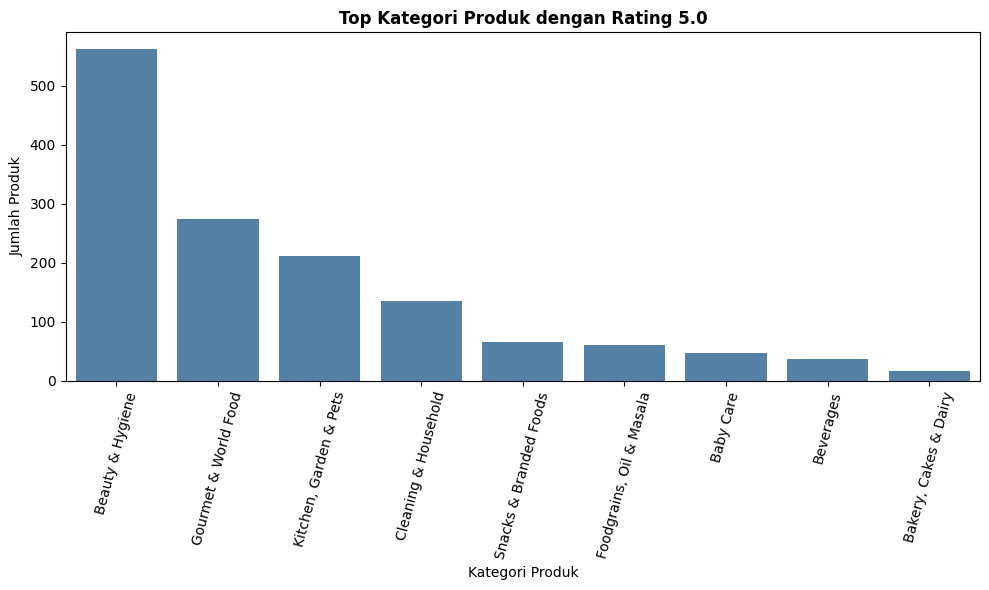

In [ ]:
# filter data dengan rating 5.0
top_items = df_products[df_products['rating'] == 5.0]

# tabel
tabel_top_items = top_items['category'].value_counts().reset_index()
tabel_top_items.columns = ['Kategori Produk', 'Jumlah Produk']
print(tabel_top_items)

# Visualisasi
plt.figure(figsize=(10,6))
sns.countplot(
    x='category',
    data=top_items,
    color='steelblue',
    order=top_items['category'].value_counts().index
)
plt.xticks(rotation=75)
plt.title('Top Kategori Produk dengan Rating 5.0', fontweight='bold')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Produk')
plt.tight_layout()
plt.show()

 Visualisasi ini menunjukkan **kategori produk dengan jumlah item terbanyak yang mendapatkan rating tertinggi (5.0)** dari pengguna. Kategori dengan performa terbaik dalam hal kepuasan pengguna adalah:
        
  * **Beauty & Hygiene** dengan **562 produk** ber-rating sempurna, menempati posisi teratas. Ini menandakan bahwa produk-produk kecantikan dan kebersihan memiliki tingkat kepuasan tinggi di kalangan konsumen.
  * **Gourmet & World Food** dan **Kitchen, Garden & Pets** masing-masing memiliki **273** dan **211 produk** dengan rating 5.0, menunjukkan kualitas produk yang baik di kategori makanan khusus dan perlengkapan rumah tangga.
  * **Cleaning & Household** juga memiliki kontribusi besar dengan **135 produk** ber-rating sempurna, yang mungkin mencerminkan keefektifan dan keandalan produk kebersihan.
  * Kategori lain seperti **Snacks & Branded Foods**, **Baby Care**, **Beverages**, dan **Bakery, Cakes & Dairy** juga tercatat memiliki sejumlah produk dengan rating sempurna, meskipun jumlahnya lebih sedikit.

* Daftar Jumlah Kategori dengan Rating Terendah

In [ ]:
low_rating = df_products['rating'].min()
low_items = df_products.loc[df_products['rating'] == low_rating]
low_items

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
64,65,Aqua Halo Rejuvenating Conditioner,Beauty & Hygiene,Hair Care,Azafran,168.75,225.0,Shampoo & Conditioner,1.0,This Aqua Halo Rejuvenating Conditioner is an ...
298,299,Family Sunscreen Lotion SPF 25,Beauty & Hygiene,Skin Care,INATUR,273.00,420.0,Face Care,1.0,Family Sunscreen SPF 25 is an innovative sun p...
299,300,Japanese Cooking Rice-Wine,Gourmet & World Food,Oils & Vinegar,Urban Platter,475.00,500.0,Flavoured & Other Oils,1.0,"Urban Platter Japanese Cooking Rice-Wine, 500m..."
435,436,Aloe Vera Juice - Purifies Blood & Boosts Immu...,Gourmet & World Food,Drinks & Beverages,Jiva Ayurveda,220.00,220.0,Health Drinks,1.0,"A natural anti-oxidant and blood purifier, Alo..."
451,452,Hair Serum - Anti-Dandruff,Beauty & Hygiene,Hair Care,Aroma Magic,637.50,750.0,Hair Oil & Serum,1.0,"I am 100% free of parabens, petrochemicals, su..."
...,...,...,...,...,...,...,...,...,...,...
27191,27192,Mukhallat Khas Concentrated Oriental Perfume F...,Beauty & Hygiene,Fragrances & Deos,Ajmal,1500.00,1500.0,Attar,1.0,A special oriental blend that will appeal to i...
27262,27263,PP Raspberry Belt,Gourmet & World Food,Chocolates & Biscuits,Kantan,30.00,30.0,"Marshmallow, Candy, Jelly",1.0,Fini Fantan Raspberry Belts contains raspberry...
27285,27286,"Dry Shampoo - Instant Hair Refresh, Coconut & ...",Beauty & Hygiene,Hair Care,Batiste,649.00,649.0,Dry Shampoo & Conditioner,1.0,"Batiste refreshes your hair between washes, le..."
27367,27368,Moroccan Argan Hair Growth Oil For Hair Growth...,Beauty & Hygiene,Hair Care,Khadi Meghdoot,375.00,375.0,Shampoo & Conditioner,1.0,This oil comes with the goodness of natural an...


            Kategori Produk  Jumlah Produk
0          Beauty & Hygiene            192
1    Kitchen, Garden & Pets             65
2      Gourmet & World Food             58
3    Snacks & Branded Foods             22
4      Cleaning & Household             19
5                 Baby Care             11
6  Foodgrains, Oil & Masala              9
7                 Beverages              9
8     Bakery, Cakes & Dairy              2


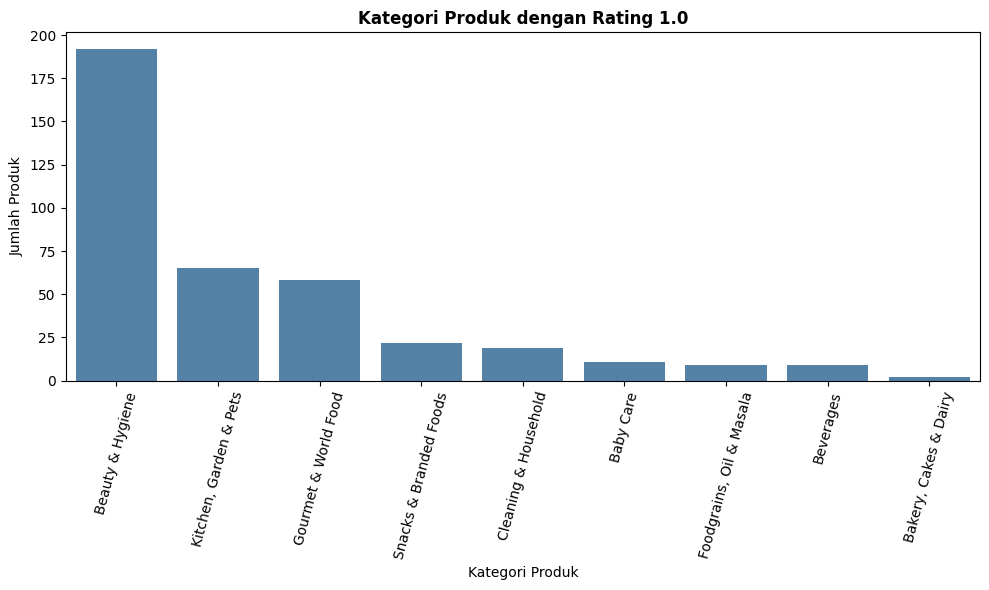

In [ ]:
# filter data dengan rating 1.0
low_items = df_products[df_products['rating'] == 1.0]

# tabel
tabel_low_items = low_items['category'].value_counts().reset_index()
tabel_low_items.columns = ['Kategori Produk', 'Jumlah Produk']
print(tabel_low_items)

# Visualisasi
plt.figure(figsize=(10,6))
sns.countplot(
    x='category',
    data=low_items,
    color='steelblue',
    order=low_items['category'].value_counts().index
)
plt.xticks(rotation=75)
plt.title('Kategori Produk dengan Rating 1.0', fontweight='bold')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Produk')
plt.tight_layout()
plt.show()

  Visualisasi tersebut menunjukkan distribusi kategori produk dengan rating terendah (1.0), di mana kategori Beauty & Hygiene memiliki jumlah produk terbanyak yang diberi rating rendah, diikuti oleh Kitchen, Garden & Pets dan Gourmet & World Food. Hal ini mengindikasikan bahwa produk-produk dalam kategori tersebut cenderung mendapat ulasan buruk dari pengguna, sehingga dapat menjadi perhatian khusus untuk evaluasi kualitas atau kepuasan pelanggan.

## **2. Data Preparation**

### **Menghapus kolom yang tidak relevan**

 Melakukan drop pada kolom ``index``, karena kolom tersebut tidak relevan untuk digunakan dalam langkah analisis yang lebih lanjut

In [ ]:
df_products.drop('index', axis=1, inplace=True)
print("Berhasil menghapus kolom index!")
df_products.head()

Berhasil menghapus kolom index!


,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


### **Menghapus duplikasi data**

In [ ]:
print(f"Total Duplicates : {df_products.duplicated().sum()}")
df_products.drop_duplicates(inplace=True)
print(f"Berhasil menghapus duplikasi data!")

Total Duplicates : 354
Berhasil menghapus duplikasi data!


### **Menangani Missing Value**

* Memeriksa mean & median rating terlebih dahulu

In [ ]:
# Mean rating
rating_mean = df_products['rating'].mean()
print(f"Mean rating adalah: {rating_mean:.2f}")

# Median rating
rating_median = df_products['rating'].median()
print(f"Median rating adalah: {rating_median:.2f}")

Mean rating adalah: 3.94
Median rating adalah: 4.10


* Menangani missing value pada kolom rating dengan nilai mean rating

In [ ]:
df_products['rating'] = df_products['rating'].fillna(value=rating_mean)
missing_after = df_products['rating'].isnull().sum()
print(f"Berhasil mengisi missing value dengan mean rating {rating_mean:.2f}")
print(f"Sisa missing value setelah pengisian: {missing_after}")

Berhasil mengisi missing value dengan mean rating 3.94
Sisa missing value setelah pengisian: 0


* Menghapus missing value pada kolom `product`, `brand` dan `description`

In [ ]:
df_products.dropna(inplace=True)

* **Memeriksa hasil setelah dilakukan drop missing value**

In [ ]:
df_products.reset_index(drop=True, inplace=True)
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27087 entries, 0 to 27086
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27087 non-null  object 
 1   category      27087 non-null  object 
 2   sub_category  27087 non-null  object 
 3   brand         27087 non-null  object 
 4   sale_price    27087 non-null  float64
 5   market_price  27087 non-null  float64
 6   type          27087 non-null  object 
 7   rating        27087 non-null  float64
 8   description   27087 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.9+ MB


### **Changing Certain Value**

Langkah selanjutnya adalah **mengubah dan membersihkan beberapa nilai dalam dataset**, terutama yang berkaitan dengan data berbasis teks. Pertama, dilakukan **pembuatan salinan** dari `df_products` ke `df_products_copy` sebagai bentuk kehati-hatian agar data asli tetap aman jika terjadi kesalahan saat modifikasi. Kemudian, dibuat fungsi `hapus_spasi` untuk menghilangkan spasi berlebih di awal atau akhir string, yang sangat penting untuk menjaga konsistensi data. Selanjutnya, dibuat fungsi `tps` (tokenisasi dan pembersihan string) yang memecah nilai berbentuk teks panjang dengan pemisah seperti `&`, `,`, `*`, atau baris baru, lalu menghilangkan spasinya. Fungsi ini diterapkan pada kolom `category`, `sub_category`, dan `type`, karena kolom-kolom ini sering berisi beberapa label dalam satu sel. Setelah itu, dilakukan **standarisasi dan pembersihan lebih lanjut** melalui fungsi `cleaner` untuk mengubah huruf menjadi kecil dan menghapus semua spasi di dalam string, baik untuk tipe list maupun string tunggal. Fungsi ini diterapkan pada kolom `category`, `sub_category`, `type`, dan `brand` untuk memastikan semua data teks bersih dan konsisten, sehingga mempermudah proses analisis selanjutnya.

* Membuat salinan df_products ke df_products_copy supaya data asli tetap aman kalau nanti ada modifikasi

In [ ]:
df_products_copy = df_products.copy()
print("Berhasil membuat salinan!")

Berhasil membuat salinan!


* Membuat Fungsi untuk Membersihkan Spasi (Whitespace Stripping)

In [ ]:
hapus_spasi = lambda a: a.strip()
print("Fungsi hapus_spasi berhasil dibuat!")

Fungsi hapus_spasi berhasil dibuat!


* Tokenisasi dan Pembersihan String

In [ ]:
tps = lambda a: list(map(hapus_spasi, re.split('& |, |\*|\n', a)))
print("Fungsi tps berhasil dibuat!")

Fungsi tps berhasil dibuat!


* Penerapan Fungsi Tokenisasi pada Beberapa Kolom

In [ ]:
for col in ['category', 'sub_category', 'type']:
    df_products_copy[col] = df_products_copy[col].apply(tps)
print("Berhasil menerapkan fungsi tps pada kolom category, sub_category, dan type!")

Berhasil menerapkan fungsi tps pada kolom category, sub_category, dan type!


* pembersihan dan standarisasi data teks

In [ ]:
def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

for col in ['category', 'sub_category', 'type', 'brand']:
    df_products_copy[col] = df_products_copy[col].apply(cleaner)

print("Berhasil membersihkan data pada kolom category, sub_category, type, dan brand!")

Berhasil membersihkan data pada kolom category, sub_category, type, dan brand!


### **Content Based Filtering**

Langkah berikutnya sebagai persiapan untuk model dengan **Content-Based Filtering** yaitu dimulai dengan membuat salinan dari `df_products_copy` menjadi `df_cbf`, agar data tetap terjaga saat dilakukan manipulasi lebih lanjut. Setelah itu, dibuat fungsi `combine_features` yang bertujuan untuk menggabungkan informasi dari beberapa kolom penting — seperti `category`, `sub_category`, `brand`, dan `type` — menjadi satu string panjang per baris data. Penggabungan ini dilakukan karena Content-Based Filtering membutuhkan representasi teks dari atribut produk yang dapat dibandingkan satu sama lain. Selanjutnya, dilakukan **ekstraksi fitur menggunakan TF-IDF Vectorizer**, yaitu metode yang mengubah teks menjadi bentuk numerik berdasarkan frekuensi dan kekhasan kata. TF-IDF secara otomatis mengabaikan kata-kata umum (stop words) agar hanya mempertahankan kata yang dianggap penting dalam membedakan satu produk dengan lainnya. Kolom hasil gabungan `gab` dari setiap produk dikonversi menjadi matriks TF-IDF, di mana baris merepresentasikan produk dan kolom merepresentasikan kata unik. Ukuran dari matriks ini adalah `(27201, 3083)`, yang berarti terdapat 27.201 produk dan 3.083 kata unik, siap untuk digunakan dalam perhitungan kemiripan produk berbasis konten.


* Melakukan inisialisasi

In [ ]:
df_cbf = df_products_copy.copy()

* Menggabungkan isi beberapa kolom jadi satu string per baris

In [ ]:
# Fungsi untuk menggabungkan beberapa kolom menjadi satu string
def combine_features(row):
    # Gabungkan list kategori menjadi string dengan spasi sebagai pemisah
    categories = ' '.join(row['category'])
    # Gabungkan list sub_kategori menjadi string dengan spasi sebagai pemisah
    sub_categories = ' '.join(row['sub_category'])
    # Ambil nama brand (string)
    brand = row['brand']
    # Gabungkan list tipe menjadi string dengan spasi sebagai pemisah
    types = ' '.join(row['type'])

    # Gabungkan semua string menjadi satu kalimat panjang dengan spasi sebagai pemisah
    combined = f"{categories} {sub_categories} {brand} {types}"
    return combined

# Terapkan fungsi
df_cbf['gab'] = df_cbf.apply(combine_features, axis=1)

* Ekstraksi Fitur TF-IDF

Membuat objek TF-IDF Vectorizer yang secara otomatis mengabaikan kata-kata umum dalam bahasa Inggris (stop words) supaya fokus ke kata yang lebih bermakna.

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

Mengubah semua teks di kolom 'gab' jadi matriks TF-IDF, di mana setiap baris adalah dokumen (baris data), dan setiap kolom mewakili kata unik yang ditemukan. Nilai di matriks menunjukkan seberapa penting sebuah kata pada dokumen tersebut.

In [ ]:
tfidf_matrix = tfidf.fit_transform(df_cbf['gab'])

Menampilkan ukuran matriks TF-IDF.

In [ ]:
tfidf_matrix.shape

(27087, 3079)

### **Collaborative Filtering**

* Membuat kolom baru bernama `user_id` di DataFrame

In [ ]:
df_products_copy['user_id'] = (df_products_copy.index % 500) + 1

Membagi data seolah-olah ada 500 pengguna yang mengulang secara siklik. Hal ini diterapkan karena dataframe tidak mempunyai kolom `user_id`, tapi ingin mensimulasikan data user untuk analisis rekomendasi produk.

In [ ]:
#hasil
df_products_copy

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,user_id
0,Garlic Oil - Vegetarian Capsule 500 mg,"[beauty, hygiene]",[haircare],srisriayurveda,220.00,220.0,"[hairoil, serum]",4.1,This Product contains Garlic Oil that is known...,1
1,Water Bottle - Orange,"[kitchen, garden, pets]","[storage, accessories]",mastercook,180.00,180.0,"[water, fridgebottles]",2.3,"Each product is microwave safe (without lid), ...",2
2,"Brass Angle Deep - Plain, No.2","[cleaning, household]",[poojaneeds],trm,119.00,250.0,"[lamp, lampoil]",3.4,"A perfect gift for all occasions, be it your m...",3
3,Cereal Flip Lid Container/Storage Jar - Assort...,"[cleaning, household]","[bins, bathroomware]",nakoda,149.00,176.0,"[laundry, storagebaskets]",3.7,Multipurpose container with an attractive desi...,4
4,Creme Soft Soap - For Hands & Body,"[beauty, hygiene]","[bath, handwash]",nivea,162.00,162.0,"[bathingbars, soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...,5
...,...,...,...,...,...,...,...,...,...,...
27082,"Wottagirl! Perfume Spray - Heaven, Classic","[beauty, hygiene]","[fragrances, deos]",layerr,199.20,249.0,[perfume],3.9,Layerr brings you Wottagirl Classic fragrant b...,83
27083,Rosemary,"[gourmet, worldfood]","[cooking, bakingneeds]",puramate,67.50,75.0,"[herbs, seasonings, rubs]",4.0,Puramate rosemary is enough to transform a dis...,84
27084,Peri-Peri Sweet Potato Chips,"[gourmet, worldfood]","[snacks, dryfruits, nuts]",fabbox,200.00,200.0,"[nachos, chips]",3.8,We have taken the richness of Sweet Potatoes (...,85
27085,Green Tea - Pure Original,[beverages],[tea],tetley,396.00,495.0,[teabags],4.2,"Tetley Green Tea with its refreshing pure, ori...",86


* Encoding Label

  Agar algoritma berbasis matriks dapat bekerja, data kategorikal harus dikonversi menjadi bentuk numerik. Ini penting karena Collaborative Filtering, terutama yang menggunakan pendekatan matrix factorization, hanya dapat memproses data numerik. Oleh karena itu, atribut seperti ``user_id`` dan ``product`` perlu diencoding menjadi angka. Proses encoding ini juga berguna untuk membentuk matriks user-item yang dibutuhkan dalam operasi aljabar linear, seperti dekomposisi matriks. Dengan begitu, sistem dapat melakukan perhitungan secara efisien dan tetap mampu menangani dataset berukuran besar.


**Tahap 1 : Encoding `user_id`**

a. Mengambil semua nilai unik dari kolom user_id dan menyimpannya dalam bentuk list

In [ ]:
user_list = df_products_copy['user_id'].unique().tolist()
print('Daftar user_id :', user_list)

Daftar user_id : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 



b. Melakukan encoding user_id

In [ ]:
user_encoding ={x: i for i, x in enumerate(user_list)}
print('Hasil encoding : ', user_encoding)

Hasil encoding :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119,

c. Mapping indexing ke `User_id`


In [ ]:
user_encoding_to_user = {i: x for i, x in enumerate(user_list)}
print("Berhasil melakukan encoding angka ke user_id!")
print("Contoh mapping index ke user_id:")

#tampilan
for i in list(user_encoding_to_user.items())[:5]:
    print(f"Index {i[0]} → user_id {i[1]}")


Berhasil melakukan encoding angka ke user_id!
Contoh mapping index ke user_id:
Index 0 → user_id 1
Index 1 → user_id 2
Index 2 → user_id 3
Index 3 → user_id 4
Index 4 → user_id 5


Code ini berfungsi untuk melacak hasil encoding ketika nanti kita menggunakan model atau sistem rekomendasi yang memakai angka untuk merepresentasikan user_id, dictionary ini berguna untuk mengubah kembali angka ke bentuk user_id asli saat menampilkan hasil rekomendasi.

---

**Tahap 2 : Encoding `product`**

a. Mengambil semua nilai unik dari kolom 'product' dan menyimpannya dalam bentuk list

In [ ]:
produk_list = df_products_copy['product'].unique().tolist()
print('Daftar produk list :', produk_list)

Daftar produk list : ['Garlic Oil - Vegetarian Capsule 500 mg', 'Water Bottle - Orange', 'Brass Angle Deep - Plain, No.2', 'Cereal Flip Lid Container/Storage Jar - Assorted Colour', 'Creme Soft Soap - For Hands & Body', 'Germ - Removal Multipurpose Wipes', 'Multani Mati', 'Hand Sanitizer - 70% Alcohol Base', 'Biotin & Collagen Volumizing Hair Shampoo + Biotin & Collagen Hair Conditioner', 'Scrub Pad - Anti- Bacterial, Regular', 'Wheat Grass Powder - Raw', 'Butter Cookies Gold Collection', 'Face Wash - Oil Control, Active', 'Mold & Mildew Remover with Bleach', 'Just Spray - Mosquito Repellent Room Spray', 'Dove Plastic Soap Case - Assorted Colour', 'Smooth Skin Oil - For Dry Skin', 'Salted Pumpkin', 'Flax Seeds - Roasted', 'Organic Tofu - Soy Paneer', 'Ceramic Barrel Brush - Colour May Vary', 'Instant Noodles - Chicken Satay Flavor', 'Chia Seeds', 'Cleanse Green Tea - Whole Leaf Loose Tea', 'Veggie Cutter', 'Insulated Hot Fresh Casserole For Roti/Chapati - White', 'Granola - Happy Berri

b. Melakukan encoding `product`

In [ ]:
produk_encoding ={x: i for i, x in enumerate(produk_list)}
print('Hasil encoding : ', produk_encoding)

Hasil encoding :  {'Garlic Oil - Vegetarian Capsule 500 mg': 0, 'Water Bottle - Orange': 1, 'Brass Angle Deep - Plain, No.2': 2, 'Cereal Flip Lid Container/Storage Jar - Assorted Colour': 3, 'Creme Soft Soap - For Hands & Body': 4, 'Germ - Removal Multipurpose Wipes': 5, 'Multani Mati': 6, 'Hand Sanitizer - 70% Alcohol Base': 7, 'Biotin & Collagen Volumizing Hair Shampoo + Biotin & Collagen Hair Conditioner': 8, 'Scrub Pad - Anti- Bacterial, Regular': 9, 'Wheat Grass Powder - Raw': 10, 'Butter Cookies Gold Collection': 11, 'Face Wash - Oil Control, Active': 12, 'Mold & Mildew Remover with Bleach': 13, 'Just Spray - Mosquito Repellent Room Spray': 14, 'Dove Plastic Soap Case - Assorted Colour': 15, 'Smooth Skin Oil - For Dry Skin': 16, 'Salted Pumpkin': 17, 'Flax Seeds - Roasted': 18, 'Organic Tofu - Soy Paneer': 19, 'Ceramic Barrel Brush - Colour May Vary': 20, 'Instant Noodles - Chicken Satay Flavor': 21, 'Chia Seeds': 22, 'Cleanse Green Tea - Whole Leaf Loose Tea': 23, 'Veggie Cutter

c. Mapping indexing kembali ke product

In [ ]:
produk_encoding_to_produk = {i: x for i, x in enumerate(produk_list)}
print("Berhasil melakukan encoding angka ke product!")
print("Contoh mapping index ke product :")

#tampilan
for i in list(produk_encoding_to_produk.items())[:5]:
    print(f"Index {i[0]} → produk : {i[1]}")

Berhasil melakukan encoding angka ke product!
Contoh mapping index ke product :
Index 0 → produk : Garlic Oil - Vegetarian Capsule 500 mg
Index 1 → produk : Water Bottle - Orange
Index 2 → produk : Brass Angle Deep - Plain, No.2
Index 3 → produk : Cereal Flip Lid Container/Storage Jar - Assorted Colour
Index 4 → produk : Creme Soft Soap - For Hands & Body


**Tahap 3** : mengubah nilai kategori (userID dan product) menjadi bentuk numerik (encoded)

In [ ]:
# Mapping user_id asli ke angka
df_products_copy['user'] = df_products_copy['user_id'].map(user_encoding)

# Mapping product ke angka
df_products_copy['produk'] = df_products_copy['product'].map(produk_encoding)

**Tahap 4** : Cek hasil

In [ ]:
users_count = len(user_encoding_to_user) # jumlah user
produk_count = len(produk_encoding_to_produk) # jumlah produk
low_rating = min(df_products_copy['rating']) # rating terendah
top_rating = max(df_products_copy['rating']) # rating tertinggi

print('Total user: {}'.format(users_count))
print('Total produk: {}'.format(produk_count))
print('Rating terendah: {}'.format(low_rating))
print('Rating tertinggi: {}'.format(top_rating))

Total user: 500
Total produk: 23449
Rating terendah: 1.0
Rating tertinggi: 5.0


### **Train & Test Split**

**Tahap 1 : Mengacak Dataset**

Data perlu diacak sebelum di-split karena kita ingin memastikan bahwa data latih (training set) dan data uji (testing set) mewakili distribusi data secara umum, bukan urutan tertentu yang bisa mempengaruhi hasil model.

In [ ]:
df_products_copy = df_products_copy.sample(frac=1, random_state=69)
df_products_copy

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,user_id,user,produk
4807,Kanda Poha,"[foodgrains, oil, masala]",[organicstaples],24mantra,90.0,90.0,"[organicrice, otherrice]",3.700000,A light and favourite breakfast of Maharashtra...,308,307,4642
2584,"Tuxedo - Eau De Parfum, For Him","[beauty, hygiene]","[fragrances, deos]",maryaj,834.5,1669.0,[eaudeparfum],3.944434,A citrus spicy fragrance designed to elaborate...,85,84,2539
6188,Tutti Frutti,"[snacks, brandedfoods]","[readytocook, eat]",askfoods,30.0,30.0,[homebaking],4.100000,Decorative items used in making cakes chocolat...,189,188,5913
20865,"Burger Buns - Safe, Preservative Free","[bakery, cakes, dairy]","[breads, buns]",fresho,29.0,29.0,"[brown, wheat, multigrain]",3.944434,Freshly Baked bread is one of life's greatest ...,366,365,18522
4460,Organic - Rice Basmati,"[foodgrains, oil, masala]",[organicstaples],phaladapure&sure,210.0,210.0,"[organicrice, otherrice]",4.500000,Pure & Sure is a range of Certified Organic Fo...,461,460,4316
...,...,...,...,...,...,...,...,...,...,...,...,...
14740,Desi Ghee/Tuppa,"[foodgrains, oil, masala]","[edibleoils, ghee]",organicindia,650.0,650.0,"[ghee, vanaspati]",4.000000,This Desi Ghee is made by simmering butter ove...,241,240,13474
25015,"Pain-X Max Body Pain Relief Gel For Muscle, Jo...","[beauty, hygiene]","[health, medicine]",dr.morepen,87.4,95.0,[everydaymedicine],5.000000,Starting your day with muscle aches can be a r...,16,15,21842
9818,Lime Juice Cordial,[beverages],"[fruitjuices, drinks]",morton,125.0,125.0,"[syrups, concentrates]",3.000000,This lemon juice will keep you refreshed with ...,319,318,9204
4041,Opalware Ivory Dinner Plate Set - Cherry Petal,"[kitchen, garden, pets]","[crockery, cutlery]",laopaladiva,840.0,840.0,"[plates, bowls]",3.944434,"As timeless as the tradition itself, ivory has...",42,41,3921


**Tahap 2 : Membuat variabel fitur (independen) `x`, yang berisi pasangan antara user dan produk.**

Pada tahapan ini, dilakukan proses pemisahan data menjadi variabel input dan output. Variabel `x` dibuat dengan mengambil kolom `user` dan `produk` dari dataframe `df_products_copy`, yang kemudian dikonversi menjadi array. Tujuan dari proses ini adalah untuk menggabungkan data pengguna dan produk dalam satu bentuk yang dapat digunakan sebagai fitur input oleh model machine learning.

In [ ]:
x = df_products_copy[['user', 'produk']].values

**Tahap 3 : Melakukan normalisasi rating menggunakan teknik Min-Max Scaling agar berada dalam rentang 0 sampai 1**

Pada baris kode `y = df_products_copy['rating'].apply(lambda x: (x - low_rating) / (top_rating - low_rating)).values`, dilakukan proses normalisasi terhadap data rating. Normalisasi ini bertujuan untuk mengubah skala nilai rating menjadi rentang antara `0` hingga `1`. Hal ini dilakukan agar setiap nilai rating memiliki bobot yang seimbang saat digunakan oleh model pembelajaran mesin.

In [ ]:
y = df_products_copy['rating'].apply(lambda x: (x - low_rating) / (top_rating - low_rating)).values

**Tahap 4 : Membagi data menjadi data latih (training data) dan data validasi (validation data)**

In [ ]:
split_data = int(0.8 * df_products.shape[0])
x_train, x_val, y_train, y_val = (
    x[:split_data],
    x[split_data:],
    y[:split_data],
    y[split_data:]
)

# Menampilkan jumlah data latih dan data validasi
print(f"Jumlah data latih: {len(x_train)}")
print(f"Jumlah data validasi: {len(x_val)}")

Jumlah data latih: 21669
Jumlah data validasi: 5418


In [ ]:
x_train

array([[  307,  4642],
       [   84,  2539],
       [  188,  5913],
       ...,
       [  140,  1622],
       [  326,  9211],
       [  209, 18004]])

In [ ]:
y_train

array([0.675     , 0.73610844, 0.775     , ..., 0.8       , 1.        ,
       0.675     ])

In [ ]:
x_val

array([[  259, 18282],
       [  474,  2013],
       [  323, 14374],
       ...,
       [  318,  9204],
       [   41,  3921],
       [  255, 20829]])

In [ ]:
y_val

array([0.825     , 0.825     , 0.825     , ..., 0.5       , 0.73610844,
       0.75      ])

## **3. Modeling & Result**

### **Content Based Filtering**

**Tahap 1 : Pembuatan Matriks TF-IDF**

Tahap ini menghasilkan representasi numerik dari atribut produk dalam bentuk matriks TF-IDF.

In [ ]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 177283 stored elements and shape (27087, 3079)>

**Tahap 2 : Perhitungan Cosine Similarity**

Menghitung tingkat kemiripan antar produk berdasarkan matriks TF-IDF yang sudah dibuat.

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05562645],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.05562645, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

**Tahap 3 : Pembuatan Indeks Produk**

Membuat struktur data untuk memetakan nama produk ke indeksnya agar pencarian lebih efisien.

In [ ]:
produk_name = df_cbf['product']
indeks_produk = pd.Series(df_cbf.index, index=df_cbf['product'])
indeks_produk

,0
product,
Garlic Oil - Vegetarian Capsule 500 mg,0
Water Bottle - Orange,1
"Brass Angle Deep - Plain, No.2",2
Cereal Flip Lid Container/Storage Jar - Assorted Colour,3
Creme Soft Soap - For Hands & Body,4
...,...
"Wottagirl! Perfume Spray - Heaven, Classic",27082
Rosemary,27083
Peri-Peri Sweet Potato Chips,27084


**Tahap 4 : Fungsi Rekomendasi Produk**

Mendefinisikan fungsi yang menerima nama produk dan mengembalikan daftar produk rekomendasi berdasarkan nilai kemiripan tertinggi.

In [ ]:
def rekomendasi_produk(produk_name, cosine_sim=cosine_sim):
    # Mengambil indeks produk berdasarkan nama produk
    indx = indeks_produk[produk_name]

    # Mengambil skor kemiripan dari produk yang diminta terhadap seluruh produk
    skor_kemiripan = list(enumerate(cosine_sim[indx]))

    # Mengurutkan produk berdasarkan skor kemiripan tertinggi
    skor_kemiripan = sorted(skor_kemiripan, key=lambda x: x[1], reverse=True)

    # Mengambil 10 produk teratas (tidak termasuk produk itu sendiri)
    skor_kemiripan = skor_kemiripan[1:11]

    # Mendapatkan indeks dari produk-produk yang direkomendasikan
    indeks_rekomendasi = [i[0] for i in skor_kemiripan]

    # Mengembalikan nama-nama produk hasil rekomendasi
    return df_cbf['product'].iloc[indeks_rekomendasi]

**Tahap 5 : Pemilihan Produk Uji Coba Secara Acak**

Memilih secara acak sebuah produk sebagai input untuk menguji fungsi rekomendasi.

In [ ]:
# Nama produk yang diminta user (dipilih secara acak dari daftar produk)
nama_produk_diminta = np.random.choice(produk_name.unique())
nama_produk_diminta

'I Love You Dark Almond Chocolate Bar, Dark Almond Flavour'

Pada tahap ini, sistem secara acak memilih satu nama produk dari daftar produk_name, yaitu kumpulan nama produk yang tersedia dalam data. Produk ini berperan sebagai input permintaan pengguna yang akan digunakan untuk mencari rekomendasi produk-produk lain yang mirip.

**Tahap 6 : Menampilkan Hasil Rekomendasi Produk**

In [ ]:
# Memanggil fungsi rekomendasi
hasil_rekom = rekomendasi_produk(nama_produk_diminta)

pd.DataFrame({
    'Produk Diminta': [nama_produk_diminta] * len(hasil_rekom),
    'Rekomendasi Produk yang Relevan': hasil_rekom
})

,Produk Diminta,Rekomendasi Produk yang Relevan
3386,"I Love You Dark Almond Chocolate Bar, Dark Alm...",Butterscotch Chocolate Bar
3662,"I Love You Dark Almond Chocolate Bar, Dark Alm...",Caramel Chocolate Bar
4097,"I Love You Dark Almond Chocolate Bar, Dark Alm...",Caramel
6173,"I Love You Dark Almond Chocolate Bar, Dark Alm...",70% Dark Hazelnut Chocolate Bar
6537,"I Love You Dark Almond Chocolate Bar, Dark Alm...",Banoffee Pie
8486,"I Love You Dark Almond Chocolate Bar, Dark Alm...","Thank you Chocolate Bar, Dark"
9183,"I Love You Dark Almond Chocolate Bar, Dark Alm...",Happy Birthday Chocolate Bar
9716,"I Love You Dark Almond Chocolate Bar, Dark Alm...",Mint Chocolate Bar
11015,"I Love You Dark Almond Chocolate Bar, Dark Alm...",Milk Marzipan
11204,"I Love You Dark Almond Chocolate Bar, Dark Alm...",Love You To The Moon And Back Signature Blend Bar


### **Collaborative Filtering**

Tahap 1 : Membangun Arsitektur Model Rekomendasi (RecommenderNet)

In [ ]:
class RecommenderNet(tf.keras.Model):

    def __init__(self, users_count, produk_count, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.users_count = users_count
        self.produk_count = produk_count
        self.embedding_size = embedding_size

        # Layer embedding untuk user (jumlah user, ukuran embedding)
        self.user_embedding = layers.Embedding(
            input_dim=users_count,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(users_count, 1)

        # Layer embedding untuk produk (jumlah produk, ukuran embedding)
        self.produk_embedding = layers.Embedding(
            input_dim=produk_count,
            output_dim=embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.produk_bias = layers.Embedding(produk_count, 1)

    def call(self, inputs):
        # inputs shape = (batch_size, 2) => kolom 0: user_id, kolom 1: produk_id

        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])

        produk_vector = self.produk_embedding(inputs[:, 1])
        produk_bias = self.produk_bias(inputs[:, 1])

        # Hitung dot product antara embedding user dan produk
        dot_user_produk = tf.reduce_sum(user_vector * produk_vector, axis=1, keepdims=True)

        # Jumlahkan dot product dengan bias user dan bias produk
        x = dot_user_produk + user_bias + produk_bias

        # Aktivasi sigmoid untuk output skor prediksi antara 0-1
        return tf.nn.sigmoid(x)

Tahap 2 : Inisialisasi dan Kompilasi Model

In [ ]:
# inisialisasi model
model = RecommenderNet(users_count, produk_count, 50)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Tahap 3 : Menyiapkan Callback Early Stopping

In [ ]:
# callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_root_mean_squared_error',
                              patience=10,
                              verbose=1,
                              restore_best_weights=True)

Tahap 4 : Melatih Model dengan Data Pelatihan

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 50,
    callbacks = [early_stop],
    validation_data = (x_val, y_val)
)


Epoch 1/50
2709/2709 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.6791 - root_mean_squared_error: 0.2686 - val_loss: 0.6411 - val_root_mean_squared_error: 0.2292
Epoch 2/50
2709/2709 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.6107 - root_mean_squared_error: 0.1957 - val_loss: 0.6150 - val_root_mean_squared_error: 0.1965
Epoch 3/50
2709/2709 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.5506 - root_mean_squared_error: 0.0986 - val_loss: 0.6104 - val_root_mean_squared_error: 0.1887
Epoch 4/50
2709/2709 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.5365 - root_mean_squared_error: 0.0643 - val_loss: 0.6053 - val_root_mean_squared_error: 0.1816
Epoch 5/50
2709/2709 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.5340 - root_mean_squared_error: 0.0603 - val_loss: 0.6023 - val_root_mean_squared_error: 0.1775
Epoch 6/50
2709/2709 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.5298 - root_mean_squared_error: 0.0520 - val_loss: 0.5979 - val_root_mean_squared_error: 0.1719
Epoch 7/50
2709/2709 ━━━━━━━━━━━━━━━━

Tahap 5 : Memilih satu user secara acak, lalu mengambil semua produk yang belum pernah diberi rating oleh user tersebut

In [ ]:
# Mengambil sample user
Id_User = df_products_copy.user_id.sample(1).iloc[0]
produk_rating_by_user = df_products_copy[df_products_copy.user_id == Id_User]

# Ambil semua produk yang belum pernah dirating oleh user
produk_not_rating = [
    [produk_encoding[x]] for x in df_products_copy['product'].unique()
    if x not in produk_rating_by_user['product'].values and x in produk_encoding
]

user_encoder = user_encoding.get(Id_User)

user_produk_array = np.hstack(
    ([[user_encoder]] * len(produk_not_rating), produk_not_rating)
)

Tahap 6 : Memprediksi dan Menampilkan Hasil Rekomendasi

In [ ]:
# Prediksi skor untuk kombinasi user dan produk yang belum dirating
prediksi_rating = model.predict(user_produk_array).flatten()

# Ambil indeks 10 prediksi tertinggi (rekomendasi terbaik)
indeks_rating_tertinggi = prediksi_rating.argsort()[-10:][::-1]

# Mapping kembali indeks produk yang direkomendasikan ke nama produk asli
produk_rekomendasi_id = [
    produk_encoding_to_produk.get(produk_not_rating[i][0]) for i in indeks_rating_tertinggi
]
# Hapus duplikat sambil mempertahankan urutan
produk_rekomendasi_id = list(dict.fromkeys(produk_rekomendasi_id))

# Tampilkan ID user yang sedang dianalisis
print('Daftar rekomendasi produk untuk user {}'.format(Id_User))
print('---' * 10)

# Tampilkan produk-produk yang paling disukai user berdasarkan rating tertinggi
print('Produk dengan rating tertinggi dari user')
print('----' * 10)

produk_top_user = (
    produk_rating_by_user.sort_values(by='rating', ascending=False)
    .head(5)['product'].values
)

# Salin data utama untuk dipakai menampilkan detail brand, dsb.
df_produk_detail = df_products_copy.copy()
produk_dinilai_user = df_produk_detail[df_produk_detail['product'].isin(produk_top_user)]

# Tampilkan produk-produk yang pernah dirating user
for row in produk_dinilai_user.itertuples():
    print(row.product, ':', row.brand)

print('----' * 8)
print('Top 10 produk rekomendasi')
print('----' * 8)

# Ambil detail produk-produk hasil rekomendasi
produk_rekomendasi_final = df_produk_detail[df_produk_detail['product'].isin(produk_rekomendasi_id)].drop_duplicates(subset='product')

# Tampilkan daftar produk hasil rekomendasi
for row in produk_rekomendasi_final.itertuples():
    print(row.product, ':', row.brand)

732/732 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Daftar rekomendasi produk untuk user 110
------------------------------
Produk dengan rating tertinggi dari user
----------------------------------------
Oil - Gingelly : raschekkuoil
Syoss - Color Salon Protect Anti Fade, 02 Conditioner : schwarzkopf
Premium Paraben Free Baby Wet Wipes With Aloe Vera : bodyguard
Oil - Gingelly : moti's
Oil - Gingelly : vvv
Induction Ceramic - Dosa Tawa : nirlon
Oil - Gingelly : moti's
Oil - Gingelly : moti's
Gold Massage Cream : naturesessence
Oil - Gingelly : idhayam
Oil - Gingelly : raschekkuoil
--------------------------------
Top 10 produk rekomendasi
--------------------------------
Man - Green Eau De Toilette Deodorant : nike
Combo - Precision Safety Razor & 10 Feather Blades : bombayshavingcompany
Charcoal Bath Soap : bombayshavingcompany
Wonder Diaper Pants - Large Size : huggies
Ayush Men Moisturiser : vlcc
Sportivo Hair Styling Pomade Wax : themancompany
Natural Body Spray & Fragrance Booster - Ice Di

## Evaluation

### Content Based Filtering

In [ ]:
def evaluate_precision(nama_produk, hasil_rekomendasi, df_cbf):
    """
    Evaluasi precision untuk rekomendasi produk berdasarkan kemiripan konten.

    Parameters:
    - nama_produk (str): Produk referensi dari user
    - hasil_rekomendasi (list): Daftar produk hasil rekomendasi
    - df_cbf (DataFrame): Dataset dengan fitur gabungan konten produk

    Returns:
    - float: Skor precision
    """
    # Tandai produk yang relevan di dalam dataset
    df_cbf['relevant'] = df_cbf['product'].isin(hasil_rekomendasi).astype(int)

    # Ambil data produk yang termasuk hasil rekomendasi
    df_relevan = df_cbf[df_cbf['product'].isin(hasil_rekomendasi)]

    y_true = df_relevan['relevant'].values
    y_pred = [1] * len(y_true)

    precision = precision_score(y_true, y_pred, zero_division=0)
    return precision

# Evaluasi
precision_cb = evaluate_precision(nama_produk_diminta, hasil_rekom, df_cbf)
print(f"Precision Content-Based Filtering untuk produk '{nama_produk_diminta}': {precision_cb:.2f}")

Precision Content-Based Filtering untuk produk 'I Love You Dark Almond Chocolate Bar, Dark Almond Flavour': 1.00


### Collaborative Filtering

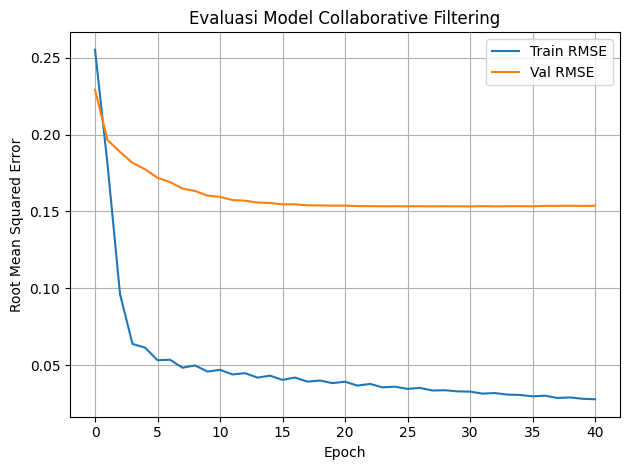

In [ ]:
# Evaluasi visual terhadap performa model
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
plt.title('Evaluasi Model Collaborative Filtering')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()